In [30]:
import numpy as np
from scipy.signal import convolve
from scipy.signal import convolve2d

from imageio import imread
import matplotlib.pyplot as plt
from IPython import display
#display.set_matplotlib_formats('svg')

# 1. Convolutional Neural Network (CNN) - Theory

A Convolution Neural Network (CNN) is essentially a localized and sparse feedfoward Multi-Layer Perceptron (MLP) that is designed to exploit spatial and/or temporal structure in the input data. Both MLP and CNN have some similarities that is described bellow:

1. Both use layers of neurons that are connected to each other with learnable weights. These weights are adjusted during training to optimize the network's performance on a specific task.

2. Both can be used for classification tasks, such as image classification, text classification, or speech recognition.

3. Both can use activation functions, such as ReLU, to introduce non-linearities into the network and improve its ability to learn complex patterns in the data.

4. Both MLPs and CNNs can be trained using backpropagation, which is an optimization algorithm that computes the gradient of the network's error with respect to its weights and uses this gradient to update the weights.

However, there are also some important differences between MLPs and CNNs:

1. MLPs are typically used for tasks that involve processing vector data, such as images that have been flattened into a 1D vector. CNNs, on the other hand, are specifically designed for tasks that involve processing multidimensional data, such as images or video.

2. CNNs use specialized layers, such as convolutional layers, pooling layers, and upsampling layers, that are optimized for processing spatial and temporal data. These layers allow the network to learn features that are invariant to translation, rotation, and scale, which is important for tasks such as image recognition.

3. CNNs can learn hierarchical representations of the input data by using multiple convolutional layers, each of which learns increasingly abstract and complex features. MLPs, on the other hand, typically use a single layer or a few layers of fully connected neurons to learn features of the input data.

In summary, while MLPs and CNNs share some similarities in terms of their architecture and training methods, CNNs are specifically designed for processing multidimensional data and have specialized layers that allow them to learn hierarchical representations of the input data.

## **1.1 Convolutions**

Convolution is a mathematical operation that involves sliding a small matrix called a kernel or filter over the input data, such as an image, and computing the dot product between the kernel and each small region of the input data. The output of this operation is a new matrix, **called a feature map**, which contains information about the presence or absence of specific features in the input data.



### **1.1.1 One Dimension**

Operation that combine two sequences of numbers into a single sequence. It involves sliding one of the sequences (usually the smaller one) over the other one and multiplying the values at each corresponding position, and then adding up the results to get a new sequence.


Let $\vec{X}$ be an input signal vector with $n$ points and $\vec{W}$ be a vector of weights called 1D filter, with $k \leq n$. Here $k$ is also known as **window size**.
$$
\vec{X} =
\left( \begin{array}{c}
x_{1}\\
x_{2}\\
\vdots\\
x_{n}
\end{array} \right), ~~~~
\vec{W} =
\left( \begin{array}{c}
w_{1}\\
w_{2}\\
\vdots\\
w_{k}
\end{array} \right)
$$

The window size refers to the size of the kernel or filter that is applied to the input. The window size determines the extent of the local neighborhood that is used for the computation of each output value. Following this idea is necessary define a subvector of $\vec{X}$ with same size as the filter. Let $\vec{X}_k(i)$ denote the window of $\vec{X}$ of length $k$ at starting position  $i$ 

$$\vec{X}_k(i) = \left( \begin{array}{c}
x_i \\
x_{i+1} \\
\vdots\\
x_{i+k-1} 
\end{array} \right)$$

as for $k \leq n$, here $i+k-1 \leq n$, that implies $1 \leq i \leq n-k+1$. As a sanity test, if the initial position start at $i =  n-k+1$, then the final position is $i+k-1 = n$. Calculating the total number of points, given by the difference between the last point position and the initial point position, the window size is $n - i = n - (n-k+1) = k$ as expected.


Given a vector $\vec{A} \in \mathbb{R}^k$, define the summation operator as one that adds all elements of the vector. That is, 

$$\text{Sum}(\vec{A}) = \sum_{i=1}^{k} a_{i}$$ 

A 1D Convolution between $\vec{X}$ and $\vec{W}$, denoted by the asterisk symbol $\ast$, is defined as 

$$\vec{X} \ast \vec{W} = \left( \begin{array}{c}
\text{Sum}(\vec{X}_k(1) \odot \vec{W})\\
\vdots\\
\text{Sum}(\vec{X}_k(i) \odot \vec{W})\\
\vdots\\
\text{Sum}(\vec{X}_k(n-k+1) \odot \vec{W})
\end{array} \right)$$

where $\odot$ is the element- wise product, so that 

$$\text{Sum}(\vec{X_k}(i) \odot \vec{W}) = \sum_{j=1}^{k} x_{i+j-1}w_j$$

The sum is over all elements of $\vec{X}_k(i)$, so the last element of this sum must coincide with the product of the last two elements of $\vec{X}_k(i)$ and $\vec{W}$ $j = k$ as $x_{i+k-1}w_k$.

 **example** 
 
The input vector $\vec{X}$ has $n=5$ points, and the weights $W$ have windows size $k = 3$. We can perform 1D convolution by sliding the weights over the input vector and multiplying each element of the input vector by the corresponding weight. The results of these multiplications are then summed up to produce a single output value.

In [24]:
# define the input vector x and the weights W
X = np.array([1, 2, 3, 4])
W = np.array([1, 2, 3])

# perform 1D convolution
# mode='valid' argument ensures that the output array has the same shape as the input array
output = np.convolve(X, W, mode='valid')

print("Input vector X:", X.shape)
print("filter W:", W.shape)
print("Convolved output X*W:", output.shape)

Input vector X: (4,)
filter W: (3,)
Convolved output X*W: (2,)


### **1.1.2 Two Dimension**

Given a 2D input matrix and a 2D kernel or filter, the convolution operation involves sliding the kernel over the input matrix, computing the dot product between the overlapping portions of the kernel and the input matrix at each position, and storing the result in an output matrix.

Let $\mathbf{X}$ be an input signal matrix with $n \times n$ points and $\mathbf{W}$ be a vector of weights called 2D filter, with $k\times k$ points and $k \leq n$.

$$
\mathbf{X} = \begin{bmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,n} \\
x_{2,1} & x_{2,2} & \cdots & x_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n,1} & x_{n,2} & \cdots & x_{n,n}
\end{bmatrix},~~
\mathbf{W}=\begin{bmatrix}
w_{1,1} & w_{1,2} & \cdots & w_{1,k} \\
w_{2,1} & w_{2,2} & \cdots & w_{2,k} \\
\vdots & \vdots & \ddots & \vdots \\
w_{k,1} & w_{k,2} & \cdots & w_{k,k}
\end{bmatrix}
$$

Let $\mathbf{X}_k(i,j)$ denote the $k \times k$ submatrix of $\mathbf{X}$ starting at row $i$ and column $j$, defined as

$$\mathbf{X}_k(i,j) = \begin{bmatrix}
x_{i,j} & x_{i,j+1} & \cdots & x_{i,j+k-1} \\
x_{i+1,j} & x_{i+2,j} & \cdots & x_{i+1,j+k-1} \\
\vdots & \vdots & \ddots & \vdots \\
x_{i+k-1,j} & x_{i+-1,j+1} & \cdots & x_{i+k-1,j+k-1}
\end{bmatrix}$$

where $1 \leq (i,j) \leq n-k+1$ (result extended from 1D case for both indices).

Given a vector $\mathbf{A} \in \mathbb{R}^{k \times k}$, define the summation operator as one that adds all elements of the vector. That is, 

$$\text{Sum}(\mathbf{A}) = \sum_{i=1}^{k}\sum_{j=1}^{k} a_{i,j}$$ 

A 2D Convolution between $\mathbf{X}$ and $\mathbf{W}$, is defined as 

$$\mathbf{X} \ast \mathbf{W} = \begin{bmatrix}
\text{Sum}(x_k(1,1) \odot \mathbf{W}) &\text{Sum}(x_k(1,2) \odot \mathbf{W}) & \cdots & \text{Sum}(x_k(1,n-k+1) \odot \mathbf{W}) \\
\text{Sum}(x_k(2,1) \odot \mathbf{W}) & \text{Sum}(x_k(2,2) \odot \mathbf{W}) & \cdots &\text{Sum}(x_k(2,n-k+1) \odot \mathbf{W})\\
\vdots & \vdots & \ddots & \vdots \\
\text{Sum}(x_k(n-k+1,1) \odot \mathbf{W}) & \text{Sum}(x_k(n-k+1,2) \odot \mathbf{W}) & \cdots & \text{Sum}(x_k(n-k+1,n-k+1) \odot \mathbf{W})
\end{bmatrix}$$

where

$$\text{Sum}(\mathbf{X}_k(i,j) \odot \mathbf{W})=\sum_{a=1}^{k}\sum_{b=1}^{k} x_{i+a -1,j+b-1} \times w_{a,b}$$

The convolution of $\mathbf{X} \in \mathbf{R}^{n \times n}$ and $\mathbf{W} \in \mathbf{R}^{k \times k}$ results in a $(n-k+1) \times (n-k+1)$ matrix.


**Example**

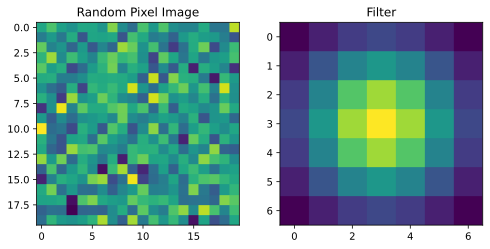

In [33]:
# image
imgN = 20
image = np.random.randn(imgN,imgN)

# convolution kernel
kernelN = 7
Y,X = np.meshgrid(np.linspace(-3,3,kernelN),np.linspace(-3,3,kernelN))
# 2D Gaussian Filter
kernel = np.exp( -(X**2+Y**2)/7 )


# let's see what they look like
fig,ax = plt.subplots(1,2,figsize=(8,6))
ax[0].imshow(image)
ax[0].set_title('Random Pixel Image')

ax[1].imshow(kernel)
ax[1].set_title('Filter')

plt.show()

In [34]:
### Manual convolution ###
convoutput = np.zeros((imgN,imgN))
halfKr = kernelN//2

for rowi in range(halfKr,imgN-halfKr):
  for coli in range(halfKr,imgN-halfKr):

    # cut out a piece of the image
    pieceOfImg = image[rowi-halfKr:rowi+halfKr+1,:]      # get the rows
    pieceOfImg = pieceOfImg[:,coli-halfKr:coli+halfKr+1] # extract the columns

    # dot product: element-wise multiply and sum (and flip the kernel for "real convolution")
    dotprod = np.sum( pieceOfImg*kernel[::-1,::-1] )

    # store the result for this pixel
    convoutput[rowi,coli] = dotprod

### Using scipy Convolution ###
convoutput2 = convolve2d(image,kernel,mode='valid')

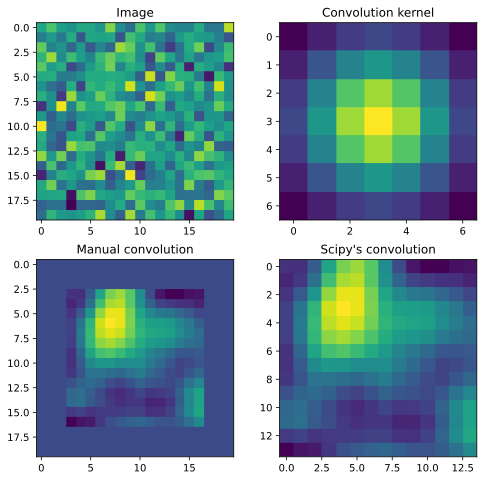

In [35]:
fig,ax = plt.subplots(2,2,figsize=(8,8))

ax[0,0].imshow(image)
ax[0,0].set_title('Image')

ax[0,1].imshow(kernel)
ax[0,1].set_title('Convolution kernel')

ax[1,0].imshow(convoutput)
ax[1,0].set_title('Manual convolution')

ax[1,1].imshow(convoutput2)
ax[1,1].set_title("Scipy's convolution")

plt.show()

### **1.1.3 Tree Dimension**

It is possible to represent a rank-3 tensor like $X_{ijq}$ in a single matrix of size $n\times n \times m$, by arranging the matrix representations of each of the $m$ matrices corresponding to different values of $1 \leq l \leq m$ as blocks in a larger matrix

$$
\mathbf{X}=
\begin{bmatrix}
\begin{bmatrix}
x_{1,1,1} & x_{1,2,1} & \cdots & x_{1,n,1} \\
x_{2,1,1} & x_{2,2,1} & \cdots & x_{2,n,1} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n,1,1} & x_{n,2,1} & \cdots & x_{n,n,1}
\end{bmatrix}\\
\\
\vdots\\
\vdots\\
\begin{bmatrix}
x_{1,1,m} & x_{1,2,m} & \cdots & x_{1,n,m} \\
x_{2,1,m} & x_{2,2,m} & \cdots & x_{2,n,m} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n,1,m} & x_{n,2,m} & \cdots & x_{n,n,m}
\end{bmatrix}
\end{bmatrix},~~


\mathbf{W}= \begin{bmatrix}
\begin{bmatrix}
w_{1,1,1} & w_{1,2,1} & \cdots & w_{1,k,1} \\
w_{2,1,1} & w_{2,2,1} & \cdots & w_{2,k,1} \\
\vdots & \vdots & \ddots & \vdots \\
w_{k,1,1} & w_{k,2,1} & \cdots & w_{k,k,1}
\end{bmatrix}\\
\\
\vdots\\
\vdots\\
\begin{bmatrix}
w_{1,1,r} & w_{1,2,r} & \cdots & w_{1,k,r} \\
w_{2,1,r} & w_{2,2,r} & \cdots & w_{2,k,r} \\
\vdots & \vdots & \ddots & \vdots \\
w_{k,1,r} & w_{k,2,r} & \cdots & w_{k,k,r}
\end{bmatrix}
\end{bmatrix}
$$

In the tensor $X_{ijq}$ the indices $i$ is for the row, $j$ for the columns and $q$ the depth, know as channels in the context of CNN. Similarly to the convolutions in others dimension, the window size must be $k \leq n$  and the total number of channels (depth) on each tensor $r \leq m$.

Let $\mathbf{X}_k(i,j,q)$ denote $k \times k  \times r$ subtensor  of $\mathbf{X}$ starting at row $i$ column $j$ and depth $q$, defined as

$$
\mathbf{X}_k(i,j,q)=
\begin{bmatrix}
\begin{bmatrix}
x_{i,j,q} & x_{i,j+1,q} & \cdots & x_{i,j+k-1,q} \\
x_{i+1,j,q} & x_{i+1,j+1,q} & \cdots & x_{i+1,j+k-1,q} \\
\vdots & \vdots & \ddots & \vdots \\
x_{i+k-1,j,q} & x_{i+k-1,j+1,q} & \cdots & x_{i+k-1,j+k-1,q}
\end{bmatrix}\\
\\
\begin{bmatrix}
x_{i,j,q} & x_{i,j+1,q} & \cdots & x_{i,j+k-1,q} \\
x_{i+1,j,q} & x_{i+1,j+1,q} & \cdots & x_{i+1,j+k-1,q} \\
\vdots & \vdots & \ddots & \vdots \\
x_{i+k-1,j,q} & x_{i+k-1,j+1,q} & \cdots & x_{i+k-1,j+k-1,q}
\end{bmatrix}\\
\vdots\\
\begin{bmatrix}
x_{i,j,q+r-1} & x_{i,j+1,q+r-1} & \cdots & x_{i,j+k-1,q+r-1} \\
x_{i+1,j,q+r-1} & x_{i+1,j+1,q+r-1} & \cdots & x_{2,n,q+r-1} \\
\vdots & \vdots & \ddots & \vdots \\
x_{i+k-1,j,q+r-1} & x_{i+k-1,j+1,q+r-1} & \cdots & x_{i+k-1,j+k-1,q+r-1}
\end{bmatrix}
\end{bmatrix}
$$

where $1 \leq (i,j) \leq n-k+1$ (same as 2D) and $1 \leq q \leq m-r+1$ .

Given a vector $\mathbf{A} \in \mathbb{R}^{k \times k \times r}$, define the summation operator as one that adds all elements of the vector. That is, 

$$\text{Sum}(A) = \sum_{a=1}^{k}\sum_{b=1}^{k}\sum_{q=1}^{r}a_{ijq}$$


The 3D convolution of $\mathbf{X}$ and $\mathbf{W}$ is

$$
\mathbf{X} \ast \mathbf{W} = 
\begin{bmatrix}
\begin{bmatrix}
\text{Sum}(X_k(1,1,1) \odot \mathbf{W})  & \cdots & \text{Sum}(X_k(1,n-k+1,1) \odot \mathbf{W}) \\
\vdots  & \ddots & \vdots \\
\text{Sum}(X_k(n-k+1,1,1) \odot \mathbf{W}) & \cdots & \text{Sum}(X_k(n-k+1,n-k+1,1) \odot \mathbf{W})
\end{bmatrix}\\
\\
\begin{bmatrix}
\text{Sum}(X_k(1,1,2) \odot \mathbf{W})  & \cdots & \text{Sum}(X_k(1,n-k+1,2) \odot \mathbf{W}) \\
\vdots  & \ddots & \vdots \\
\text{Sum}(X_k(n-k+1,1,2) \odot \mathbf{W}) & \cdots & \text{Sum}(X_k(n-k+1,n-k+1,2) \odot \mathbf{W})
\end{bmatrix}\\
\\
\vdots\\
\\
\begin{bmatrix}
\text{Sum}(X_k(1,1,m-k+1) \odot \mathbf{W})  & \cdots & \text{Sum}(X_k(1,n-k+1,m-k+1) \odot \mathbf{W}) \\
\vdots  & \ddots & \vdots \\
\text{Sum}(X_k(n-k+1,1,m-k+1) \odot \mathbf{W}) & \cdots & \text{Sum}(X_k(n-k+1,n-k+1,m-k+1) \odot \mathbf{W})
\end{bmatrix}
\end{bmatrix}
$$

where 

$$\text{Sum}(\mathbf{X}_k(i,j,q) \odot \mathbf{W}) = \sum_{a=1}^{k}\sum_{b=1}^{k}\sum_{c=1}^{r}x_{i+a-1,j+b-1,q+c-1}w_{a,b,c}$$

for $(i,j) = 1,2, \cdots, n-k+1$ and $q = 1,2, \cdots, m-r+1$. The convolution of $\mathbf{X} \in \mathbf{R}^{n \times n \times m}$ and $\mathbf{W} \in \mathbf{R}^{k \times k \times r}$ results in a $(n-k+1) \times (n-k+1) \times (m-r+1)$ tensor.

**Example** 
 
The input tensor $\mathbf{X} \in \mathbb{R}^{n \times n \times m}$ has $n=3$ and depth $m=3$, and the filter $\mathbb{W} \in \mathbb{R}^{k \times k \times r}$ have window size $k = 2$ and depth $r=2$. The results of the convolution is a matrix of shape $2\times 2 \times 2$.

In [28]:
# create a simple 3D matrix
X = np.array([
    [     [1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]   ],
    
    [   [10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]  ],
    
    [   [19, 20, 21],
        [22, 23, 24],
        [25, 26, 27]  ],
                        ])

# create a simple 3D kernel
W = np.array([    
    [   [1, 0],
        [0, -1] ],

    [   [0, 1],
        [-1, 0] ]
                    ])


# perform 3D convolution using the convolve function
output = convolve(X, W, mode='valid')

# print the output
print("Input vector x:\n", X.shape)
print("filter W:\n", W.shape)
print("Convolved output:\n", output)


Input vector x:
 (3, 3, 3)
filter W:
 (2, 2, 2)
Convolved output:
 [[[6 6]
  [6 6]]

 [[6 6]
  [6 6]]]


## **1.2 3D Convolutions in CNNs**

Typically in CNNs, we use a 3D filter $\mathbf{W} \in \mathbb{R}^{k \times k \times m}$, with the number of channels $r=m$, the same as the number of channels of $\mathbf{X} \in \mathbb{R}^{n \times n \times m}$.

Each channel of the input signal $\mathbf{X}$ represents a different aspect or feature of the input data, and **the filter is used to extract features from the input data $\mathbf{X}$ by convolving it with the filter tensor $\mathbf{W}$**. By using a filter $\mathbf{W}$ with the same number of channels as the input signal $\mathbf{X}$, we can ensure that the filter is applied to every channel of the input data. This allows the network to learn features from each channel of the input signal separately, which can improve the overall performance of the network.

From the 3D convolution of $\mathbf{X}$ and $\mathbf{W}$ with different number of channels, $r \leq m$, give us

$$
\mathbf{X} \ast \mathbf{W} = 
\begin{bmatrix}
\begin{bmatrix}
\text{Sum}(X_k(1,1,1) \odot \mathbf{W})  & \cdots & \text{Sum}(X_k(1,n-k+1,1) \odot \mathbf{W}) \\
\vdots  & \ddots & \vdots \\
\text{Sum}(X_k(n-k+1,1,1) \odot \mathbf{W}) & \cdots & \text{Sum}(X_k(n-k+1,n-k+1,1) \odot \mathbf{W})
\end{bmatrix}\\
\\
\begin{bmatrix}
\text{Sum}(X_k(1,1,2) \odot \mathbf{W})  & \cdots & \text{Sum}(X_k(1,n-k+1,2) \odot \mathbf{W}) \\
\vdots  & \ddots & \vdots \\
\text{Sum}(X_k(n-k+1,1,2) \odot \mathbf{W}) & \cdots & \text{Sum}(X_k(n-k+1,n-k+1,2) \odot \mathbf{W})
\end{bmatrix}\\
\\
\vdots\\
\\
\begin{bmatrix}
\text{Sum}(X_k(1,1,m-r+1) \odot \mathbf{W})  & \cdots & \text{Sum}(X_k(1,n-k+1,m-r+1) \odot \mathbf{W}) \\
\vdots  & \ddots & \vdots \\
\text{Sum}(X_k(n-k+1,1,m-r+1) \odot \mathbf{W}) & \cdots & \text{Sum}(X_k(n-k+1,n-k+1,m-r+1) \odot \mathbf{W})
\end{bmatrix}
\end{bmatrix}
$$

When consider $r = m$ the result of the convolution is a matrix of two dimension, and not a tensor . The matrix from the convolution has dimension $(n-k+1) \times (n-k+1)$:

$$
\mathbf{X} \ast \mathbf{W} = 
\begin{bmatrix}
\text{Sum}(X_k(1,1) \odot \mathbf{W})  & \cdots & \text{Sum}(X_k(1,n-k+1) \odot \mathbf{W}) \\
\vdots  & \ddots & \vdots \\
\text{Sum}(X_k(n-k+1,1) \odot \mathbf{W}) & \cdots & \text{Sum}(X_k(n-k+1,n-k+1) \odot \mathbf{W})
\end{bmatrix}
$$

We can see this as if each channel in $\mathbf{W}$ matches with a channel in $\mathbf{X}$, forming a matrix with only one channel with features from the original matrix $\mathbf{X}$. 



### **1.2.1 Filter Bias**

The filter bias term can be seen as an intercept term, which can shift the activation function up or down. This means that it can adjust the output of the convolutional layer for a particular input, depending on the specific features of the input.

For example, if a particular feature is more prevalent in the input, the filter bias can be set to a higher value to increase the activation of that feature, making it more likely to be detected by subsequent layers. Similarly, if a particular feature is less important, the bias can be set to a lower value to decrease the activation, reducing the impact of that feature on the output of the network.

Let $\mathbf{Z}^l \in \mathbb{R}^{n_l \times n_l \times m_l}$ tensor of neurons at layer $l$ so $Z_{i,j,q}^{l}$ denotes the value of the neuron at row $i$, column $j$ and channel $q$ for layer l, with  $1 \leq (i,j)  \leq n_l$ and $1 \leq q \leq m_l$. Consider a 3D filter $\mathbf{W} \in \mathbb{R}^{k \times k \times m_l}$. When convolve  $\mathbf{Z}^l$ and  $\mathbf{W}$ gives a $(n_l-k+1) \times (n_l-k+1) \times 1$ matrix (or a tensor with depth 1) at $\mathbf{Z}^{l+1}$, that defines the height and width of the layer.

The depth of $\mathbf{Z}^{l+1}$ is $1$ because the filter has a depth of $m_l$, equal the depth of $\mathbf{Z}^{l}$,so each scalar output is obtained by convolving the filter $\mathbf{W}$ with the corresponding channel of $\mathbf{Z}^{l}$, and the resulting scalar outputs are summed over all channels to produce a single output for each position.

Finally let define the bias filter as a scalar value for $\mathbf{W}$, $b \in \mathbb{R}$., and let $\mathbf{Z}_{k}^{l}(i,j)$ denote  the $k \times k \times m_l$ subtensor of $\mathbf{Z}^{l}$ at position $(i,j)$. Then, we can define the net signal at neuron $z_{i,j}^{l+1}$ in layer $l+1$ as

$$\text{net}_{i,j}^{l+1} = \text{Sum}(\mathbf{Z}_{k}^{l}(i,j) \odot \mathbf{W})+ b$$

and the value of the neuron $z_{i,j}^{l+1}$  is obtained by applying some activation function $f$ to the net signal

$$z_{i,j}^{l+1} = f \bigg(\text{Sum}(\mathbf{Z}_{k}^{l}(i,j) \odot \mathbf{W})+ b \bigg)$$

the activation function can be nay of the ones typically used in neural networks. In the notation of convolitions, the values of the neurons in layer $l+1$ is given as follows

$$\mathbf{Z}^{l+1} = f\bigg((\mathbf{Z}^l \ast \mathbf{W}) \oplus b \bigg)$$

where $\oplus$ indicatews that the bias term $b$ is added to each element of the $(n_l-k+1)\times (n_l-k+1) \times 1$ matrix $\mathbf{Z}^l \ast \mathbf{W}$.

### **1.2.2 Multiple 3D Filters**

When multiple filters are applied to an input tensor in a CNN, the output tensor's depth increases. Each filter generates a single channel in the output tensor, and the number of filters applied determines the number of channels in the output tensor. This **increased depth allows the network to learn a larger set of features from the input tensor**. The combination of multiple filters at each layer helps the network to identify and learn different features in the input data, which in turn improves the network's performance on a given task.

Consider one 3D filter $\mathbf{W} \in \mathbb{R}^{k \times k \times m_l}$ with a corresponding bias term b and $\mathbf{Z}^l \in \mathbb{R}^{n_l \times n_l \times m_l}$. The convolution results in a $(n_l-k+1) \times (n_l -k+1) \times 1$ matrix of neurons in layer $l+1$. But  in order to improves the network's performance we expect as result a tensor of neuron values of dimension $(n_l-k+1) \times (n_l -k+1) \times m_{l+1}$ at layer $l+1$. Therefore, we need $m_{l+1}$ different $\mathbf{W}_q \in \mathbb{R}^{k \times k \times m_l}$ with corresponding bias term $b_q$, as follow

$$z_{i,j,q}^{l+1} = f \bigg(\text{Sum}(\mathbf{Z}_{k}^{l}(i,j) \odot \mathbf{W}_q)+ b_q \bigg)$$

wich can be written as

$$\mathbf{Z}^{l+1} = \begin{bmatrix}
f \bigg(\text{Sum}(\mathbf{Z}_k^l(i,j) \odot\mathbf{W}_1) \oplus b_1\bigg)\\
\vdots\\
f \bigg(\text{Sum}(\mathbf{Z}_k^l(i,j) \odot \mathbf{W}_q) \oplus b_q \bigg)\\
\vdots\\
f \bigg(\text{Sum}(\mathbf{Z}_k^l(i,j) \odot \mathbf{W}_{m_{l+1}}) \oplus b_{m_{l+1}}\bigg)
\end{bmatrix} =
\begin{bmatrix}
f \bigg(\mathbf{Z}^l \ast \mathbf{W}_1 \oplus b_1\bigg)\\
\vdots\\
f \bigg(\mathbf{Z}^l \ast \mathbf{W}_q \oplus b_q \bigg)\\
\vdots\\
f \bigg(\mathbf{Z}^l \ast \mathbf{W}_{m_{l+1}} \oplus b_{m_{l+1}}\bigg)
\end{bmatrix}
$$

where each element is a matrix of dimension $(n_l-k+1) \times (n_l -k+1)$, for example take the $q^{th}$ element:

$$f \bigg(\text{Sum}(\mathbf{Z}_k^l(i,j) \odot \mathbf{W}_q) \oplus b_q \bigg) = 
\begin{bmatrix}
f\bigg(\text{Sum}(Z_k^l(1,1) \odot \mathbf{W}_q) \oplus b_q\bigg) & \cdots & f\bigg(\text{Sum}(Z_k^l(1,n_l-k+1) \odot \mathbf{W}_q) \oplus b_q\bigg)\\ 
\vdots  & \ddots & \vdots \\
f\bigg(\text{Sum}(Z_k^l(_ln-k+1,1) \odot \mathbf{W}_q)\oplus b_q \bigg)& \cdots & f\bigg(\text{Sum}(Z_k^l(n_l-k+1,n_l-k+1) \odot \mathbf{W}_q)\oplus b_q\bigg)
\end{bmatrix}$$

In summary, The depth of the output tensor is determined by the number of filters used, and each depth slice represents the output of a particular filter. Therefore, the number of neurons in the output tensor is equal to the product of the spatial dimensions of the output tensor and the number of filters used in the convolution operation. So layer $\mathbf{Z}^{l+1}$ has $(n_l-k+1) \times (n_l -k+1) \times m_l$ neurons, with $m_l$ filters apply to each matrix $(n_l-k+1) \times (n_l -k+1)$.

### **1.2.3 Padding and Striding**

One of the issues with the convolution operation is that the size of the tensor will decrease in each successive CNN layer. If $l$ has size $n_l \times n_l \times m_l$, and  we use filters of size $k \times k \times m_l$, then each channel in a layer $l+1$ will have size $(n_l-(k-1)) \times (n_l-(k-1))$. That is, the number of rows and columns for each successive tensor will shrink by $k-1$.



**Padding**

Padding involves adding zeros or other values around the edges of the input data before applying a convolutional filter. The purpose of padding is to preserve the spatial dimensions of the input data in the output feature map. Without padding, the spatial dimensions of the output feature map would be reduced after each convolutional layer, leading to the loss of important spatial information. By adding padding, the spatial dimensions of the output feature map can be preserved or even increased.

Assume that we add $p$ rows and columns. With padding $p$, the implicit size of layer $l$ tensor is then $(n_l + 2p) \times (n_l +2p) \times m_l$. Assume that each filter is of size $k \times k \times m_l$, and assume there are $m_{l+1}$ filters, then the size of the layer $l+1$ tensor will be $(n_l + 2p -(k-1)) \times (n_l + 2p-(k-1)) \times m_l$. Since we want to preserve the size of the resulting tensor, we need to have

$$n_l +2p - (k-1)  \geq n_l$$

wich implies $p = \frac{k-1}{2}$

**Striding**

Striding, on the other hand, involves moving the convolutional filter across the input data by a certain number of pixels, rather than by one pixel at a time. The purpose of striding is to control the spatial dimensions of the output feature map by reducing the number of times the convolutional filter is applied. A larger stride value leads to a smaller output feature map, while a smaller stride value leads to a larger output feature map.

Consider an integer value $s \geq 1$ called the stride. A 3D convolution of $\mathbf{Z}^l$ with size $n_l \times n_l \times m_l$ with filter $\mathbf{W}$ of size $k \times k \times m_l$, using stride $s$, is given as:

$$\mathbf{Z}^l\ast \mathbf{W} = \begin{bmatrix}
\text{Sum}(\mathbf{Z}^l_k(1,1) \odot \mathbf{W}) &\text{Sum}(\mathbf{Z}^l_k(1,1+s) \odot \mathbf{W}) & \cdots & \text{Sum}(\mathbf{Z}^l_k(1,1+t.s) \odot \mathbf{W}) \\
\text{Sum}(\mathbf{Z}^l_k(1+s,1) \odot \mathbf{W}) & \text{Sum}(\mathbf{Z}^l_k(1+s,1+s) \odot \mathbf{W}) & \cdots &\text{Sum}(\mathbf{Z}^l_k(1+s,1+t.s) \odot \mathbf{W})\\
\vdots & \vdots & \ddots & \vdots \\
\text{Sum}(\mathbf{Z}^l_k(n1+t.s,1) \odot \mathbf{W}) & \text{Sum}(\mathbf{Z}^l_k(1+t.s,1+s) \odot \mathbf{W}) & \cdots & \text{Sum}(\mathbf{Z}^l_k(1+t.s,1+t.s) \odot \mathbf{W})
\end{bmatrix}$$

where $t = \frac{n_l-k}{s}$. The convolution results in a $(t +1) \times (t+1)$ matrix.